# HW 03 - Nonparametric Methods
## Yakup Can Karacaoğlu 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Import Data

In [2]:
# read data into memory
data_set = np.genfromtxt("hw03_data_set.csv", delimiter = ",", skip_header = 1)

# get x and y values
x = data_set[:, 0]
y = data_set[:, 1]

#Seperate the train set
x_train = x[: 150,]
y_train = y[: 150,]
N_train = x_train.shape[0]

#Seperate the test set
x_test = x[150:,]
y_test = y[150:,]
N_test = x_test.shape[0]



# Create Bin Arrays

In [3]:
bin_width = 0.37
minimum_value = 1.5
#maximum_value = np.max(x_train)
maximum_value = 5.2
data_interval = np.linspace(minimum_value, maximum_value, 371)

left_borders = np.arange(start = minimum_value,
                         stop = maximum_value,
                         step = bin_width)
right_borders = np.arange(start = minimum_value + bin_width,
                          stop = maximum_value + bin_width,
                          step = bin_width)
print(left_borders)
print(right_borders)

[1.5  1.87 2.24 2.61 2.98 3.35 3.72 4.09 4.46 4.83]
[1.87 2.24 2.61 2.98 3.35 3.72 4.09 4.46 4.83 5.2 ]


# Prediction

In [67]:
y_predicted = np.asarray([np.sum(((left_borders[b] < x_train) & (x_train <= right_borders[b]))*y_train)
                    for b in range(len(left_borders))]) / np.asarray([np.sum((left_borders[b] < x_train) & (x_train <= right_borders[b]))
                    for b in range(len(left_borders))])

# Plot 

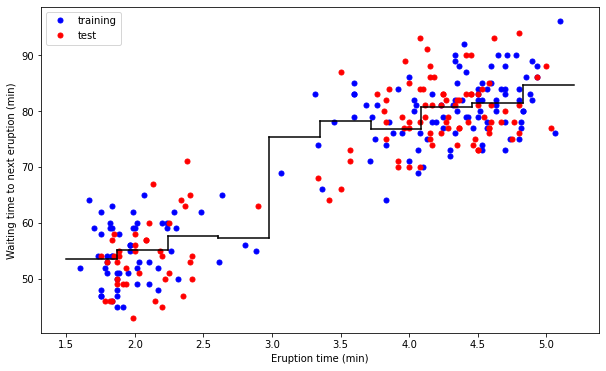

In [68]:
plt.figure(figsize = (10, 6))
plt.plot(x_train, y_train, "b.", markersize=10, )
plt.plot(x_test, y_test, "r.", markersize=10)
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(["training", "test"], loc ="upper left")

for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [y_predicted[b], y_predicted[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [y_predicted[b], y_predicted[b + 1]], "k-")  

plt.show()

# RMSE

In [69]:
#def rmse(y_real,y_predicted):
    #return np.sqrt(np.sum(y_real-y_predicted)**2 / y_real.shape[0])
error = 0
for i in range(N_test):
    for j in range(len(left_borders)):
        if((x_test[i] > left_borders[j]) & (x_test[i] < right_borders[j])):
            error += (y_test[i] - y_predicted[j])**2

rmse = (np.sqrt(error / N_test))
            
print("Regressogram => RMSE is ", rmse, " when h is ", bin_width)

Regressogram => RMSE is  5.962617204275407  when h is  0.37


# Mean Smoother

In [70]:
bin_width = 0.37

def w(u):
    if(np.abs(u) <= 0.5):
        return 1
    else:
        return 0

y_predicted = []
for x in data_interval:
    num = 0
    denum = 0
    for j in range(N_train):
        num += w((x-x_train[j]) / bin_width) * y_train[j]
        denum += w((x-x_train[j]) / bin_width)
    y_predicted.append(num/denum)




# Plot 

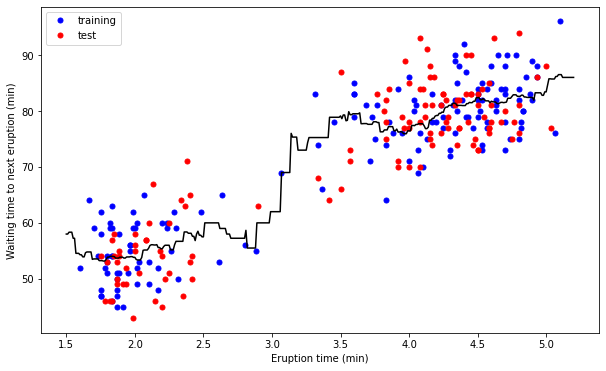

In [71]:
plt.figure(figsize = (10, 6))
plt.plot(x_train, y_train, "b.", markersize=10, )
plt.plot(x_test, y_test, "r.", markersize=10)
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(["training", "test"], loc ="upper left")

plt.plot(data_interval, y_predicted, "k-")
plt.show()

# RMSE for mean smoother

In [72]:
error = 0
for i in range(N_test):
    for j in range(len(y_predicted) - 1):
        if((x_test[i] >= data_interval[j]) & (x_test[i] < data_interval[j+1])):
            error += (y_test[i] - y_predicted[j + 1])**2

rmse = (np.sqrt(error / N_test))
            
print("Running Mean Smoother => RMSE is ", rmse, " when h is ", bin_width)

Running Mean Smoother => RMSE is  6.112976634291571  when h is  0.37


# Kernel Smoother

In [73]:
bin_width = 0.37

def k(u):
    return np.exp(-(u**2)/2)/np.sqrt(2*math.pi)

y_predicted = []
for x in data_interval:
    num = 0
    denum = 0
    for j in range(N_train):
        num += k((x - x_train[j]) / bin_width) * y_train[j]
        denum += k((x - x_train[j]) / bin_width)
    y_predicted.append(num/denum)
    

# Plot for Kernel Smoother

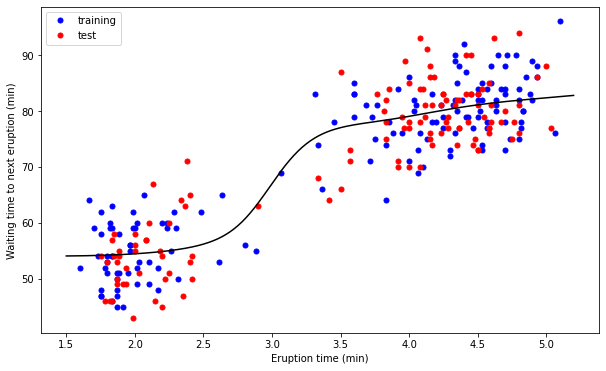

In [74]:
plt.figure(figsize = (10, 6))
plt.plot(x_train, y_train, "b.", markersize=10, )
plt.plot(x_test, y_test, "r.", markersize=10)
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(["training", "test"], loc ="upper left")

plt.plot(data_interval, y_predicted, "k-")
plt.show()

# RMSE for Kernel Smoother

In [75]:
error = 0
for i in range(N_test):
    for j in range(len(y_predicted) - 1):
        if((x_test[i] >= data_interval[j]) & (x_test[i] < data_interval[j+1])):
            error += (y_test[i] - y_predicted[j + 1])**2

rmse = (np.sqrt(error / N_test))
            
print("Kernel Smoother => RMSE is ", rmse, " when h is ", bin_width)

Kernel Smoother => RMSE is  5.875237231531083  when h is  0.37
